In [1]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import networkx as nx

In [2]:
S = 'susceptible'
I = 'infectado'
R = 'recuperado'
M = 'muerto'


class Agente:
    def __init__(self, 
                 estado=None):
        self.tiempo_infectado = 0
        if not estado:
            self.estado = random.choice([S, I, R])
        else:
            self.estado = estado
            
    def actualiza_estado(self):
        if self.estado == I:
            if self.tiempo_infectado < duracion_infeccion:
                if random.random() <= probabilidad_recuperacion:
                    self.estado = R
                else:
                    self.tiempo_infectado += 1
            else:
                self.estado = M

In [3]:
def time_step(H):
    g = copy.deepcopy(H)

    # lista de infectados y muertos
    nodos_i = [n for n in g.nodes 
               if g.nodes[n]['agente'].estado == I]

    # infectados probablemente contagian a sus vecinos
    for n in nodos_i:
        for exposed in g.neighbors(n):
            if (random.random() <= probabilidad_infeccion
                and
                g.nodes[exposed]['agente'].estado == S):
                g.nodes[exposed]['agente'].estado = I
                
    # actualiza estado de nodos
    for n in g.nodes():
        g.nodes[n]['agente'].actualiza_estado()
    
    # quitar muertos
    nodos_muertos = [n for n in g.nodes 
                     if g.nodes[n]['agente'].estado == M]
    for n in nodos_muertos:
        g.remove_node(n)

    return g

In [4]:
def sir_plot(g):
    nodos_s = [n for n in g.nodes 
               if g.nodes[n]['agente'].estado == S]
    nodos_i = [n for n in g.nodes 
               if g.nodes[n]['agente'].estado == I]
    nodos_r = [n for n in g.nodes 
               if g.nodes[n]['agente'].estado == R]
            
    pos=nx.spring_layout(g)

    nx.draw_networkx_nodes(g, pos,
                           nodelist=nodos_i,
                           node_color='orange',
                           node_size=23,
                           alpha=1)
    nx.draw_networkx_nodes(g, pos,
                           nodelist=nodos_s,
                           node_color='teal',
                           node_size=30,
                           alpha=0.3)
    nx.draw_networkx_nodes(g, pos,
                           nodelist=nodos_r,
                           node_color='purple',
                           node_size=30,
                           alpha=0.3)
    nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.1)

In [5]:
G = nx.erdos_renyi_graph(100, 0.11)

for n in G.nodes():
    G.nodes[n]['agente'] = Agente(estado=S)

# infectemos un par
n = random.choice(list(G.nodes))
G.nodes[n]['agente'].estado = I

duracion_infeccion = 2
probabilidad_infeccion = 0.6
probabilidad_recuperacion = 0.22

iteraciones = 10

t = [G.copy(), ]
for i in range(1, iteraciones):
    t.append(time_step(t[i-1]))


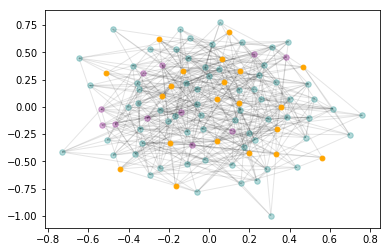

In [6]:
sir_plot(t[2])

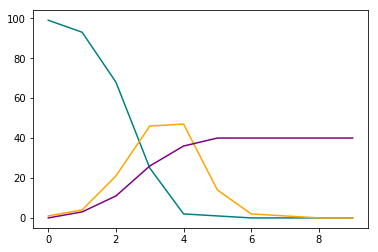

In [7]:
count_s = []
count_i = []
count_r = []

for h in t:
    count_s.append(len([n for n in h.nodes
                        if h.nodes[n]['agente'].estado == S]))
    count_i.append(len([n for n in h.nodes
                        if h.nodes[n]['agente'].estado == I]))
    count_r.append(len([n for n in h.nodes
                        if h.nodes[n]['agente'].estado == R]))                     
                       
plt.plot(range(len(t)), count_s, color='teal')
plt.plot(range(len(t)), count_i, color='orange')
plt.plot(range(len(t)), count_r, color='purple')  